In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from datetime import datetime 
from sklearn.metrics import roc_auc_score as auc 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

df = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/syndata/syndata.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
X = df[:5000]
y = X['isFraud']
X = X.drop(['nameOrig', 'nameDest','isFlaggedFraud'], axis = 1)
X = pd.get_dummies(X,prefix=['type'])
X = X.drop(['isFraud'], axis = 1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [15]:
for i in X:
    print(type(list(X[i])[0]))

<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


TypeError: '<' not supported between instances of 'float' and 'str'

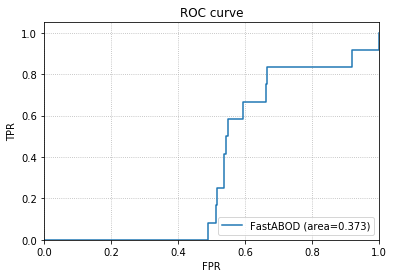

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from kenchi.outlier_detection import *
from kenchi.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

scaler = StandardScaler()

detectors = [
    FastABOD(novelty=True, n_jobs=-1),
    MiniBatchKMeans(13,"kd_tree"), 
    LOF(n_neighbors=8, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=-1),
    KNN(novelty=True, n_jobs=-1), 
    IForest(n_jobs=-1),
    PCA(), KDE()
]


X_train, X_test, _, y_test = train_test_split(X, y)
    
# Get the current Axes instance
ax = plt.gca()

for det in detectors:
    # Fit the model according to the given training data
    pipeline = make_pipeline(scaler, det).fit(X_train)

    # Plot the Receiver Operating Characteristic (ROC) curve
    pipeline.plot_roc_curve(X_test, y_test, ax=ax)

# Display the figure
plt.show()